In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
sns.set_style('whitegrid')

In [2]:
dfUSA = pd.read_csv('USvideos.csv', index_col=0, parse_dates=True, skipinitialspace=True)
dfUSA['trending_date'] = pd.to_datetime(dfUSA['trending_date'], format='%y.%d.%m')

dfCA = pd.read_csv('CAvideos.csv', index_col=0, parse_dates=True, skipinitialspace=True)
dfCA['trending_date'] = pd.to_datetime(dfCA['trending_date'], format='%y.%d.%m')

dfGB = pd.read_csv('GBvideos.csv', index_col=0, parse_dates=True, skipinitialspace=True)
dfGB['trending_date'] = pd.to_datetime(dfGB['trending_date'], format='%y.%d.%m')

dfDE = pd.read_csv('DEvideos.csv', index_col=0, parse_dates=True, skipinitialspace=True)
dfDE['trending_date'] = pd.to_datetime(dfDE['trending_date'], format='%y.%d.%m')

dfFR = pd.read_csv('FRvideos.csv', index_col=0, parse_dates=True, skipinitialspace=True)
dfFR['trending_date'] = pd.to_datetime(dfFR['trending_date'], format='%y.%d.%m')

In [3]:
def map_categories(nation_name, df_nation):
    id_dict = {}
    file_name = '{0}_category_id.json'.format(nation_name)
    with open(file_name, 'r') as file:
        data = json.load(file)
        for category in data['items']:
            id_dict[int(category['id'])] = category['snippet']['title']
    
    df_nation['category_id'] = df_nation['category_id'].map(id_dict)

map_categories('US',dfUSA)
map_categories('GB',dfGB)
map_categories('CA',dfCA)
map_categories('DE',dfDE)
map_categories('FR',dfFR)

In [5]:
US_categories = dfUSA.groupby('category_id').count()[dfUSA.columns[0]]
GB_categories = dfGB.groupby('category_id').count()[dfGB.columns[0]]
CA_categories = dfCA.groupby('category_id').count()[dfCA.columns[0]]
FR_categories = dfFR.groupby('category_id').count()[dfFR.columns[0]]
DE_categories = dfDE.groupby('category_id').count()[dfDE.columns[0]]

In [6]:
dfUSA.head().reset_index()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


(array([49.,  3.,  2.,  0.,  1.,  0.,  0.,  2.,  0.,  1.]),
 array([4.85000000e+03, 1.10755112e+07, 2.21461724e+07, 3.32168336e+07,
        4.42874948e+07, 5.53581560e+07, 6.64288172e+07, 7.74994784e+07,
        8.85701396e+07, 9.96408008e+07, 1.10711462e+08]),
 <a list of 10 Patch objects>)

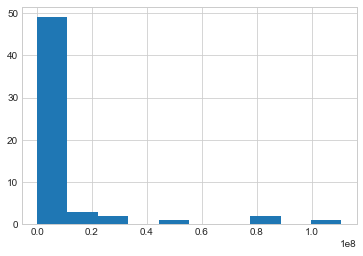

In [50]:
US_categories_and_creator = dfUSA.groupby(['category_id','channel_title'])[["views"]].sum()['views']
# sum(['views'])['title']
#len(US_categories_and_creator)
#len(US_categories_and_creator)
US_categories_and_creator = US_categories_and_creator.reset_index()
temp_hist = US_categories_and_creator[US_categories_and_creator['category_id']=='Autos & Vehicles']
#US_categories_and_creator[US_categories_and_creator['category_id']='Autos & Vehicles']
 #min(temp_hist['views'])
# US_categories_and_creator
plt.hist(temp_hist['views'].tolist())

In [13]:
def df_to_json_export(df, output_filename):
    with open(output_filename, 'w') as f:
        f.write(df.to_json(orient='split'))

# df_to_json_export(US_categories, 'us-catts.json')
# df_to_json_export(CA_categories, 'ca-catts.json')
# df_to_json_export(GB_categories, 'gb-catts.json')
# df_to_json_export(FR_categories, 'fr-catts.json')
# df_to_json_export(DE_categories, 'de-catts.json')

In [16]:
df_to_json_export(US_categories_and_creator, 'us-catts-creats.json')